# Import Libraries and Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
# sns.set(style="ticks")

In [2]:
df = pd.read_csv('data/AppleStore.csv')
df.head()

,Unnamed: 0,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,prime_genre,sup_devices.num,lang.num
0,1,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,Games,38,10
1,2,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,Productivity,37,23
2,3,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,Weather,37,3
3,4,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,Shopping,37,9
4,5,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,Reference,37,45


# Check Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 13 columns):
Unnamed: 0          7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
lang.num            7197 non-null int64
dtypes: float64(3), int64(6), object(4)
memory usage: 731.1+ KB


# Draw Graphs

## Const Vars

In [4]:
supSize = 30
titleSize = 20
labelSize = 15
tickSize = 12

## Matplotlib

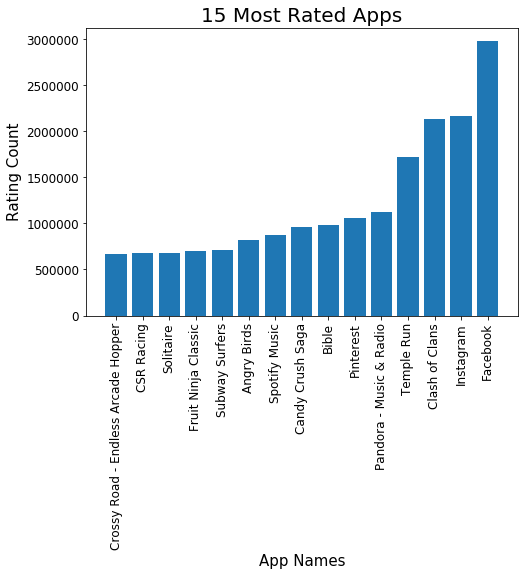

In [5]:
#TAR 4
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
x = df.sort_values(['rating_count_tot'])[-15:]['track_name']
y = df.sort_values(['rating_count_tot'])[-15:]['rating_count_tot']

ax.bar(x, y)

ax.set_title('15 Most Rated Apps', fontsize=titleSize)
ax.set_xlabel('App Names', fontsize=labelSize)
ax.set_ylabel('Rating Count', fontsize=labelSize)
plt.xticks(rotation=90, fontsize=tickSize)
plt.yticks(fontsize=tickSize)

plt.show()

C:\Users\mthee\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27880 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mthee\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25991 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mthee\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mthee\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22810 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mthee\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mthee\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12502 missing from c

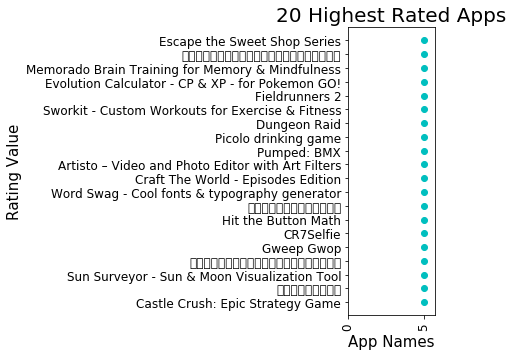

In [6]:
#TAR 5
fig = plt.figure()
ax = fig.add_axes([0, 0, .2, 1])
x = df.sort_values(['user_rating'])[-20:]['track_name']
y = df.sort_values(['user_rating'])[-20:]['user_rating']

ax.plot(y, x, 'co')

ax.set_title('20 Highest Rated Apps', fontsize=titleSize)
ax.set_xlabel('App Names', fontsize=labelSize)
ax.set_ylabel('Rating Value', fontsize=labelSize)
plt.xticks(rotation=90, fontsize=tickSize)
plt.yticks(fontsize=tickSize)
ax.set_xlim(0, 5.7)

plt.show()

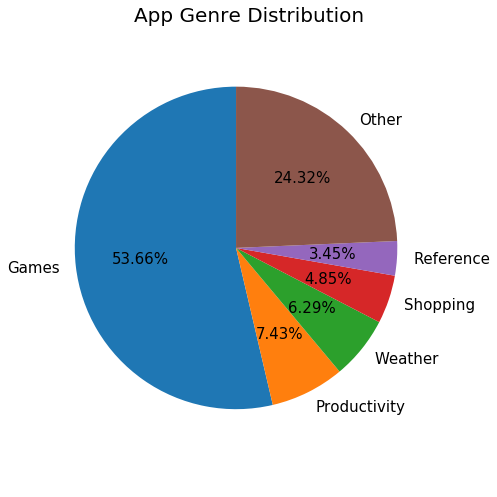

In [7]:
sliceIndex = 5
labels = df['prime_genre'].unique()[:sliceIndex]
labels = np.append(labels, ["Other"])
sizes = df['prime_genre'].value_counts()[:sliceIndex]
sizes = np.append(sizes, [len(df)-df['prime_genre'].value_counts()[:sliceIndex].sum()])

fig, ax = plt.subplots(figsize=(7, 7), tight_layout=True)
ax.pie(sizes, labels=labels, autopct='%.2f%%', startangle=90, textprops={"fontsize": labelSize})
ax.axis('equal')
fig.suptitle('App Genre Distribution', fontsize=titleSize)

plt.show()

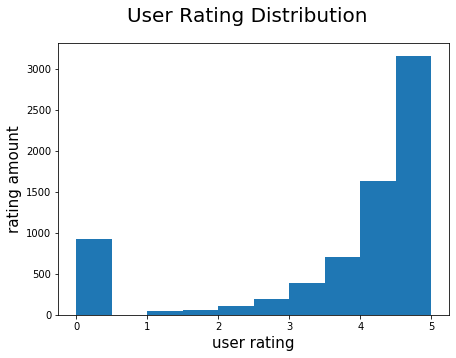

In [8]:
fig, axs = plt.subplots(figsize=(7, 5), tight_layout=False)
axs.hist(df["user_rating"])
fig.suptitle('User Rating Distribution', fontsize=titleSize)
plt.xlabel('user rating', fontsize=labelSize)
plt.ylabel('rating amount', fontsize=labelSize)
plt.show()

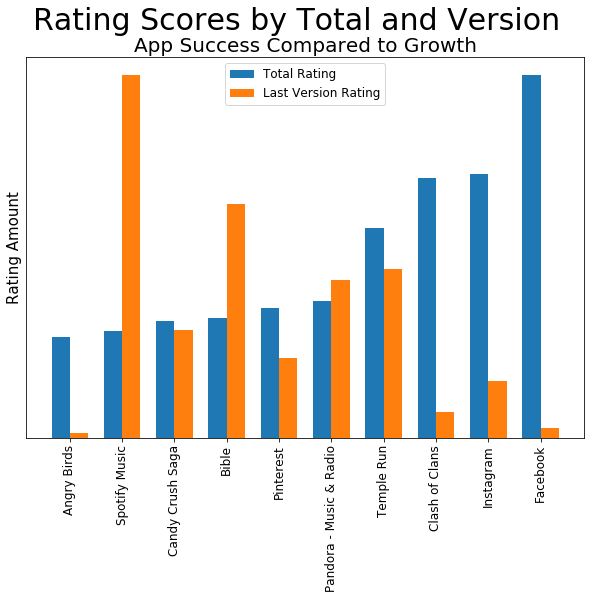

In [9]:
# import matplotlib
# import matplotlib.pyplot as plt
# import numpy as np
apps = 10
dff = df.sort_values(['rating_count_tot'])[-apps:][['track_name', 'rating_count_tot', 'rating_count_ver']].set_index('track_name')
labels = dff.index
tot_rating = dff['rating_count_tot']/dff['rating_count_tot'].max()
ver_rating = dff['rating_count_ver']/dff['rating_count_ver'].max()

mu = np.arange(apps)
width = 0.35

fig, ax = plt.subplots(figsize=(10, 7), tight_layout=False)
ax.bar(mu - width/2, tot_rating, width, label='Total Rating')
ax.bar(mu + width/2, ver_rating, width, label='Last Version Rating')

fig.suptitle ('Rating Scores by Total and Version', fontsize=supSize)
ax.set_title('App Success Compared to Growth', fontsize=titleSize)
ax.set_ylabel('Rating Amount', fontsize=labelSize)

ax.set_xticks(mu)
plt.xticks(rotation=90)
ax.set_xticklabels(labels, fontsize=tickSize)
ax.set_yticks([])
ax.legend(fontsize=tickSize)

plt.show()

In [10]:
def attach_ordinal(num):
    """helper function to add ordinal string to integers

    1 -> 1st
    56 -> 56th
    """
    suffixes = {str(i): v
                for i, v in enumerate(['th', 'st', 'nd', 'rd', 'th',
                                       'th', 'th', 'th', 'th', 'th'])}

    v = str(num)
    # special case early teens
    if v in {'11', '12', '13'}:
        return v + 'th'
    return v + suffixes[v[-1]]


def format_score(scr, test):
    """
    Build up the score labels for the right Y-axis by first
    appending a carriage return to each string and then tacking on
    the appropriate meta information (i.e., 'laps' vs 'seconds'). We
    want the labels centered on the ticks, so if there is no meta
    info (like for pushups) then don't add the carriage return to
    the string
    """
    md = testMeta[test]
    if md:
        return '{0}\n{1}'.format(scr, md)
    else:
        return scr


def format_ycursor(y):
    y = int(y)
    if y < 0 or y >= len(testNames):
        return ''
    else:
        return testNames[y]

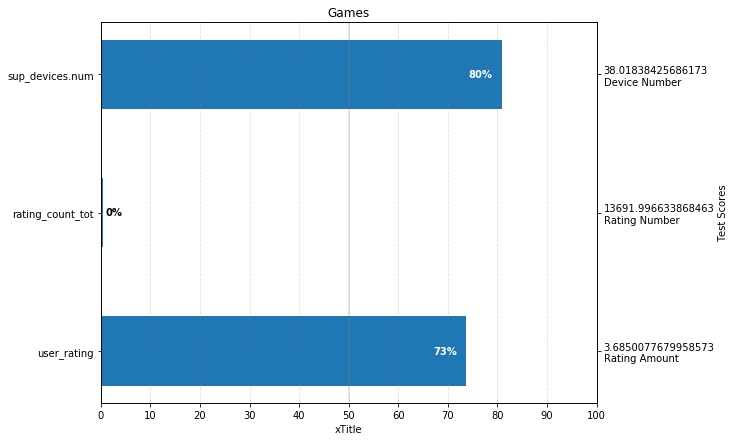

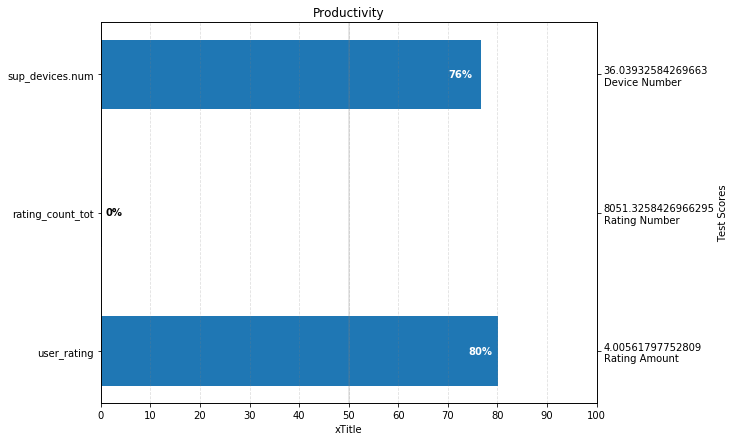

In [13]:
# import numpy as np
# import matplotlib
# import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

# MOST SUCCESFUL APP FITURES

np.random.seed(43)

Student = namedtuple('Student', ['name', 'grade', 'gender'])
Score = namedtuple('Score', ['score', 'percentile'])

# GLOBAL CONSTANTS
testNames = ['user_rating', 'rating_count_tot', 'sup_devices.num']
testMeta = dict(zip(testNames, ['Rating Amount', 'Rating Number', 'Device Number']))





def plot_student_results(student, scores, cohort_size):
    #  create the figure
    fig, ax1 = plt.subplots(figsize=(9, 7))
    fig.subplots_adjust(left=0.115, right=0.88)
    fig.canvas.set_window_title('Eldorado K-8 Fitness Chart')

    pos = np.arange(len(testNames))

    rects = ax1.barh(pos, [scores[k].percentile for k in testNames],
                     align='center',
                     height=0.5,
                     tick_label=testNames)

    ax1.set_title(student.name)

    ax1.set_xlim([0, 100])
    ax1.xaxis.set_major_locator(MaxNLocator(11))
    ax1.xaxis.grid(True, linestyle='--', which='major',
                   color='grey', alpha=.25)

    # Plot a solid vertical gridline to highlight the median position
    ax1.axvline(50, color='grey', alpha=0.25)

    # Set the right-hand Y-axis ticks and labels
    ax2 = ax1.twinx()

    scoreLabels = [format_score(scores[k].score, k) for k in testNames]

    # set the tick locations
    ax2.set_yticks(pos)
    # make sure that the limits are set equally on both yaxis so the
    # ticks line up
    ax2.set_ylim(ax1.get_ylim())

    # set the tick labels
    ax2.set_yticklabels(scoreLabels)

    ax2.set_ylabel('Test Scores')

    xlabel = ('{grade} Grade {gender}s\n'
              'Cohort Size: {cohort_size}')
#     ax1.set_xlabel(xlabel.format(grade=Student.name,#attach_ordinal(23),
#                                  gender=student.gender.title(),
#                                  cohort_size=cohort_size))
    ax1.set_xlabel("xTitle")

    
    
    rect_labels = []
    # Lastly, write in the ranking inside each bar to aid in interpretation
    for rect in rects:
        # Rectangle widths are already integer-valued but are floating
        # type, so it helps to remove the trailing decimal point and 0 by
        # converting width to int type
        width = int(rect.get_width())

        rankStr = "{}%".format(width)
        if width < 40:
            xloc = 5
            clr = 'black'
            align = 'left'
        else:
            xloc = -5
            clr = 'white'
            align = 'right'

        # Center the text vertically in the bar
        yloc = rect.get_y() + rect.get_height() / 2
        label = ax1.annotate(rankStr, xy=(width, yloc), xytext=(xloc, 0),
                            textcoords="offset points",
                            ha=align, va='center',
                            color=clr, weight='bold', clip_on=True)
        rect_labels.append(label)

    # make the interactive mouse over give the bar title
    ax2.fmt_ydata = format_ycursor
    # return all of the artists created
    return {'fig': fig,
            'ax': ax1,
            'ax_right': ax2,
            'bars': rects,
            'perc_labels': rect_labels}



sliceIndex = 4
apps = df['prime_genre'].unique()[:sliceIndex]

app1 = Student(apps[0], 22222, 'boyyyyyy')
app2 = Student(apps[1], 3333222, 'bGGGy')

def scoreBars(categories, df, app):
    rnd = []
    for i in range(len(categories)):
        rnd.append(df[df['prime_genre'] == app][categories[i]].mean()/df[categories[i]].max()*100)
    scores = dict(zip(testNames,
                  (Score(v, p) for v, p in
                   zip([df[df['prime_genre'] == app][categories[0]].mean(),
                        df[df['prime_genre'] == app][categories[1]].mean(),
                        df[df['prime_genre'] == app][categories[2]].mean()],
                        rnd))))
    return scores

# rnd = np.round(np.random.uniform(0, 1, len(testNames)) * 100, 0)
# print(rnd)
# rnd = scoreBars(testNames, df, apps[0])
scores = scoreBars(testNames, df, apps[0])
cohort_size = df[df['prime_genre'] == apps[0]].count()
arts1 = plot_student_results(app1, scores, cohort_size)

scores = scoreBars(testNames, df, apps[1])
cohort_size = df[df['prime_genre'] == apps[1]].count()
arts2 = plot_student_results(app2, scores, cohort_size)
plt.show()

## Seaborn

C:\Users\mthee\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\mthee\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


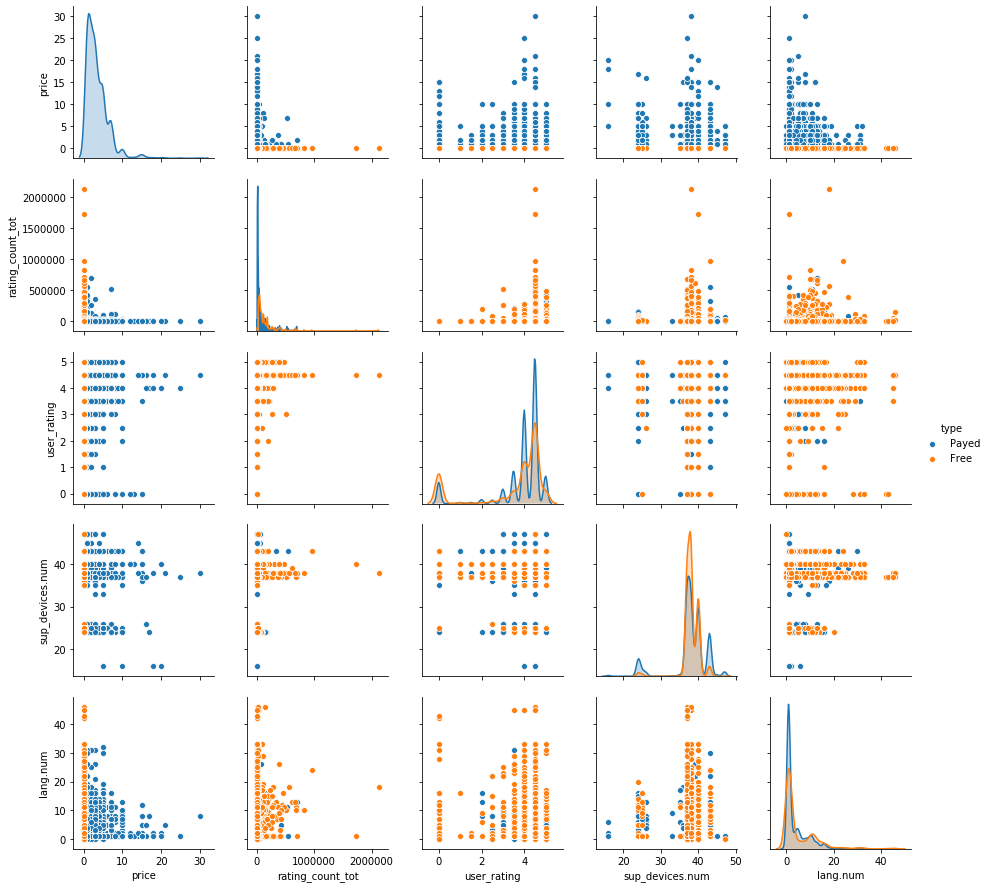

In [12]:
#Tar 6
import seaborn as sns
dfTmp = df[df["prime_genre"] == "Games"].copy()
rule = ['Free' if x else 'Payed' for x in dfTmp['price'] == 0]
dfTmp['type'] = rule
sns.pairplot(dfTmp[['type', 'price', 'rating_count_tot', 'user_rating', 'sup_devices.num', 'lang.num']], hue="type")
plt.show()